# Bayesian Regression

### Neil D. Lawrence

### 2025-09-15

**Abstract**: Bayesian formalisms deal with uncertainty in parameters,

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

## ML Foundations Course Notebook Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_mlfc/includes/mlfc-notebook-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We install some bespoke codes for creating and saving plots as well as
loading data sets.

In [1]:
%%capture
%pip install notutils
%pip install pods
%pip install mlai

In [2]:
import notutils
import pods
import mlai
import mlai.plot as plot

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## Overdetermined System

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/bayesian-regression.gpp.markdown" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/bayesian-regression.gpp.markdown', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In the first lecture motivate the introduction of probability by
considering systems where there were more observations than unknowns. In
particular we can consider the simple fitting of the gradient and an
offset of a line, $$
y= mx+c.
$$ What happens if we have three pairs of observations of $x$ and $y$,
$\{x_i, y_i\}_{i=1}^3$. The issue can be solved by introducing a type of
[slack variable](http://en.wikipedia.org/wiki/Slack_variable),
$\epsilon_i$, known as noise, such that for each observation we had the
equation, $$
y_i = mx_i + c + \epsilon_i.
$$

# Underdetermined System

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/underdetermined-system.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/underdetermined-system.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [4]:
import mlai.plot as plot

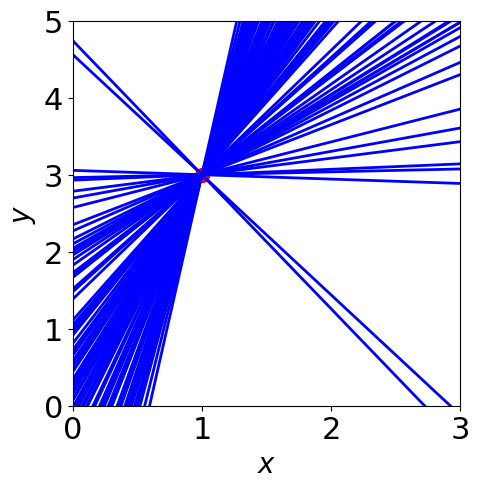

In [5]:
plot.under_determined_system(diagrams='./ml')

What about the situation where you have more parameters than data in
your simultaneous equation? This is known as an *underdetermined*
system. In fact, this set up is in some sense *easier* to solve, because
we don’t need to think about introducing a slack variable (although it
might make a lot of sense from a *modelling* perspective to do so).

The way Laplace proposed resolving an overdetermined system, was to
introduce slack variables, $\epsilon_i$, which needed to be estimated
for each point. The slack variable represented the difference between
our actual prediction and the true observation. This is known as the
*residual*. By introducing the slack variable, we now have an additional
$n$ variables to estimate, one for each data point, $\{\epsilon_i\}$.
This turns the overdetermined system into an underdetermined system.
Introduction of $n$ variables, plus the original $m$ and $c$ gives us
$n+2$ parameters to be estimated from $n$ observations, which makes the
system *underdetermined*. However, we then made a probabilistic
assumption about the slack variables, we assumed that the slack
variables were distributed according to a probability density. And for
the moment we have been assuming that density was the Gaussian,
$$\epsilon_i \sim \mathscr{N}\left(0,\sigma^2\right),$$ with zero mean
and variance $\sigma^2$.

The follow up question is whether we can do the same thing with the
parameters. If we have two parameters and only one unknown, can we place
a probability distribution over the parameters as we did with the slack
variables? The answer is yes.

## Underdetermined System

In [6]:
import notutils as nu
from ipywidgets import IntSlider

In [7]:
nu.display_plots('under_determined_system{samp:0>3}.svg',
                 directory='./ml', samp=IntSlider(0, 0, 9, 1))

interactive(children=(IntSlider(value=0, description='samp', max=9), Output()), _dom_classes=('widget-interact…

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/under_determined_system009.svg" class="" width="40%" style="vertical-align:middle;">

Figure: <i>An underdetermined system can be fit by considering
uncertainty. Multiple solutions are consistent with one specified
point.</i>

## Solution

{\* Place

## A Philosophical Dispute: Probabilistic Treatment of Parameters?

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/types-of-uncertainty.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/types-of-uncertainty.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

From a philosophical perspective placing a probability distribution over
the *parameters* is known as the *Bayesian* approach. This is because
Thomas Bayes, in a [1763
essay](http://en.wikipedia.org/wiki/An_Essay_towards_solving_a_Problem_in_the_Doctrine_of_Chances)
published at the Royal Society introduced the [Bernoulli
distribution](http://en.wikipedia.org/wiki/Bernoulli_distribution) with
a probabilistic interpretation for the *parameters*. Later statisticians
such as [Ronald Fisher](http://en.wikipedia.org/wiki/Ronald_Fisher)
objected to the use of probability distributions for *parameters*, and
so in an effort to discredit the approach the referred to it as
Bayesian. However, the earliest practioners of modelling, such as
Laplace applied the approach as the most natural thing to do for dealing
with unknowns (whether they were parameters or variables).
Unfortunately, this dispute led to a split in the modelling community
that still has echoes today. It is known as the Bayesian vs Frequentist
controversy. From my own perspective, I think that it is a false
dichotomy, and that the two approaches are actually complementary.

My own focus research focus is on *modelling* and in that context, the
use of probability is vital. For frequenstist statisticians, such as
Fisher, the emphasis was on the value of the evidence in the data for a
particular hypothesis. This is known as hypothesis testing. The two
approaches can be unified because one of the most important approaches
to hypothesis testing is to [compute the ratio of the
likelihoods](http://en.wikipedia.org/wiki/Likelihood-ratio_test), and
the result of applying a probability distribution to the parameters is
merely to arrive at a different form of the likelihood.

## The Bayesian Controversy: Philosophical Underpinnings

A segment from the lecture in 2012 on philsophical underpinnings.

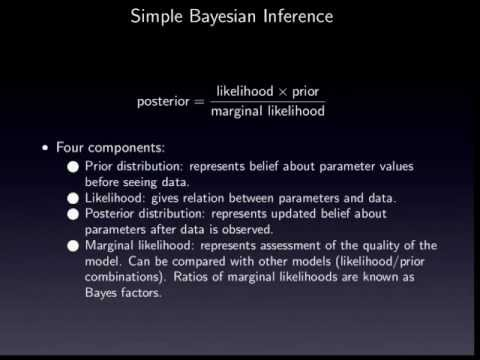

In [8]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('AvlnFnvFw_0')

Figure: <i>The philosophical underpinnings of uncertainty, as discussed
in 2012 MLAI lecture.</i>

Our model doesn’t capture the entire system, we use the *noise* model to
capture aspects of the system we didn’t model explicitly. It gives the
mismatch between our model’s predictions and the data. The Gaussian
noise model can be justified by appealing to the central limit theorem,
but other noise models are also possible (e.g. the Student-$t$
distribution has heavy tails and deals better with outliers). Maximum
likelihood with the Gaussian leads to least squares.

When we are being Bayesian we are assuming uncertainty in the
parameters. This uncertainty comes from e.g. not having seen enough
data.

The parameter uncertainty can be thought of as *epistemic* uncertainty.
I.e. uncertainty that arises from lack of knowledge. But the noise model
uncertainty can be thought of as *aleatoric* uncertainty. It is
uncertainty that is intrinsic to the system as we’ve modelled it. No
amount of data will reduce it. Note, that this interpretation implies
that the split between aleatoric uncertainty and epistemic is a result
of our modelling choice. Of course, we can make our model more complex
and reduce the amount of aleatoric uncertainty. See for example the
bias-variance dilemma.

## Prior Distribution

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/bayesian-regression1d-short.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/bayesian-regression1d-short.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The tradition in Bayesian inference is to place a probability density
over the parameters of interest in your model. This choice is made
regardless of whether you generally believe those parameters to be
stochastic or deterministic in origin. In other words, to a Bayesian,
the modelling treatment does not differentiate between epistemic and
aleatoric uncertainty. For linear regression we could consider the
following Gaussian prior on the intercept parameter,
$$c \sim \mathscr{N}\left(0,\alpha_1\right)$$ where $\alpha_1$ is the
variance of the prior distribution, its mean being zero.

## Posterior Distribution

-   The posterior is found through **Bayes’ Rule** $$
    p(c|y) = \frac{p(y|c)p(c)}{p(y)}
    $$ $$
    \text{posterior} = \frac{\text{likelihood}\times \text{prior}}{\text{marginal likelihood}}
    $$}

The prior distribution is combined with the likelihood of the data given
the parameters $p(y|c)$ to give the posterior via *Bayes’ rule*, $$
  p(c|y) = \frac{p(y|c)p(c)}{p(y)}
  $$

where $p(y)$ is the marginal probability of the data, obtained through
integration over the joint density, $p(y, c)=p(y|c)p(c)$. Overall the
equation can be summarized as,  
$$
  \text{posterior} = \frac{\text{likelihood}\times \text{prior}}{\text{marginal likelihood}}.
  $$

In [9]:
import mlai.plot as plot

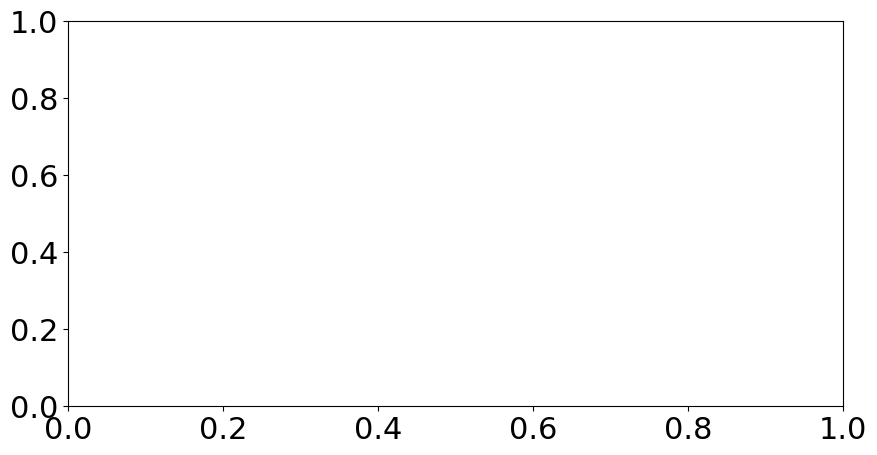

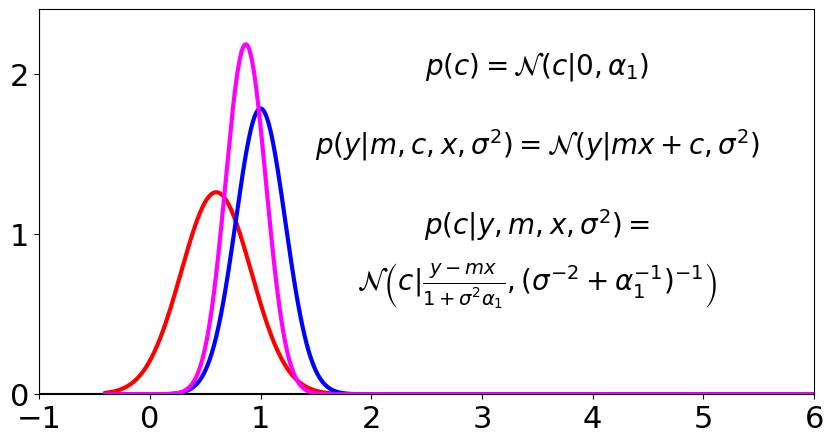

In [10]:
plot.bayes_update(diagrams='./ml')

In [11]:
from ipywidgets import IntSlider
import pods

In [12]:
import notutils as nu

In [13]:
nu.display_plots('dem_gaussian{stage:0>3}.svg',
                            directory='./ml',
                            stage=IntSlider(1, 1, 3, 1))

interactive(children=(IntSlider(value=1, description='stage', max=3, min=1), Output()), _dom_classes=('widget-…

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/dem_gaussian003.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>Combining a Gaussian likelihood with a Gaussian prior to form
a Gaussian posterior</i>

Another way of seeing what’s going on is to note that the numerator of
Bayes’ rule merely multiplies the likelihood by the prior. The
denominator, is not a function of $c$. So the functional form is
entirely determined by the multiplication of prior and likelihood. This
has the effect of ensuring that the posterior only has probability mass
in regions where both the prior and the likelihood have probability
mass.

The marginal likelihood, $p(y)$, operates to ensure that the
distribution is normalised.

For the Gaussian case, the normalisation of the posterior can be
performed analytically. This is because both the prior and the
likelihood have the form of an *exponentiated quadratic*, $$
\exp(a^2)\exp(b^2) = \exp(a^2 + b^2),
$$ and the properties of the exponential mean that the product of two
exponentiated quadratics is also an exponentiated quadratic. That
implies that the posterior is also Gaussian, because a normalized
exponentiated quadratic is a Gaussian distribution.[1]

[1] Note not all exponentiated quadratics can be normalized, to do so,
the coefficient associated with the variable squared, $y^2$, must be
strictly positive.

## Main Trick

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/bayesian-regression1d-maths.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/bayesian-regression1d-maths.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

$$
p(c) = \frac{1}{\sqrt{2\pi\alpha_1}} \exp\left(-\frac{1}{2\alpha_1}c^2\right)
$$

$$
p(\mathbf{ y}|\mathbf{ x}, c, m, \sigma^2) =
\frac{1}{\left(2\pi\sigma^2\right)^{\frac{n}{2}}}  \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - mx_i - c)^2\right)
$$

$$
p(c| \mathbf{ y}, \mathbf{ x}, m, \sigma^2) = \frac{p(\mathbf{ y}|\mathbf{ x}, c, m, \sigma^2)p(c)}{p(\mathbf{ y}|\mathbf{ x}, m, \sigma^2)}
$$

$$
p(c| \mathbf{ y}, \mathbf{ x}, m, \sigma^2) =  \frac{p(\mathbf{ y}|\mathbf{ x}, c, m, \sigma^2)p(c)}{\int p(\mathbf{ y}|\mathbf{ x}, c, m, \sigma^2)p(c) \text{d} c}
$$

$$
p(c| \mathbf{ y}, \mathbf{ x}, m, \sigma^2) \propto  p(\mathbf{ y}|\mathbf{ x}, c, m, \sigma^2)p(c)
$$

complete the square of the quadratic form to obtain $$
\log p(c | \mathbf{ y}, \mathbf{ x}, m, \sigma^2) = -\frac{1}{2\tau^2}(c - \mu)^2 +\text{const},
$$ where $\tau^2 = \left(n\sigma^{-2} +\alpha_1^{-1}\right)^{-1}$ and
$\mu = \frac{\tau^2}{\sigma^2} \sum_{i=1}^n(y_i-mx_i)$.

## Bayesian Inference in the Univariate Case

This video talks about Bayesian inference across the single parameter,
the offset $c$, illustrating how the prior and the likelihood combine in
one dimension to form a posterior.

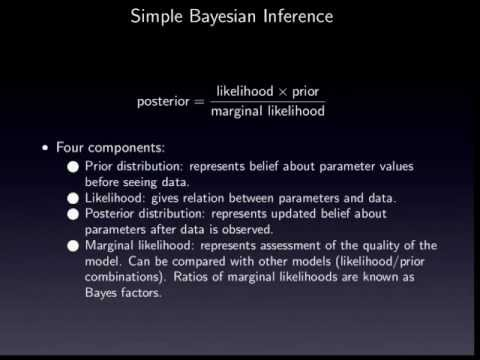

In [14]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('AvlnFnvFw_0')

Figure: <i>Univariate Bayesian inference. Lecture 10 from 2012 MLAI
Course.</i>

## The Joint Density

This gives us the distribution over $c$, but in reality we want to know
the *joint* posterior density over the parmeters $c$ and $m$. We could
find this by now considering $m$, but it’s easier to consider the
multivariate case.

## Two Dimensional Gaussian

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/two-d-gaussian.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/two-d-gaussian.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Consider the distribution of height (in meters) of an adult male human
population. We will approximate the marginal density of heights as a
Gaussian density with mean given by $1.7\text{m}$ and a standard
deviation of $0.15\text{m}$, implying a variance of $\sigma^2=0.0225$,
$$
  p(h) \sim \mathscr{N}\left(1.7,0.0225\right).
  $$ Similarly, we assume that weights of the population are distributed
a Gaussian density with a mean of $75 \text{kg}$ and a standard
deviation of $6 kg$ (implying a variance of 36), $$
  p(w) \sim \mathscr{N}\left(75,36\right).
  $$

In [ ]:
import mlai.plot as plot

In [ ]:
plot.height_weight(diagrams='./ml')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/height_weight_gaussian.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>Gaussian distributions for height and weight.</i>

## Independence Assumption

First of all, we make an independence assumption, we assume that height
and weight are independent. The definition of probabilistic independence
is that the joint density, $p(w, h)$, factorizes into its marginal
densities, $$
  p(w, h) = p(w)p(h).
  $$ Given this assumption we can sample from the joint distribution by
independently sampling weights and heights.

In [21]:
import mlai.plot as plot

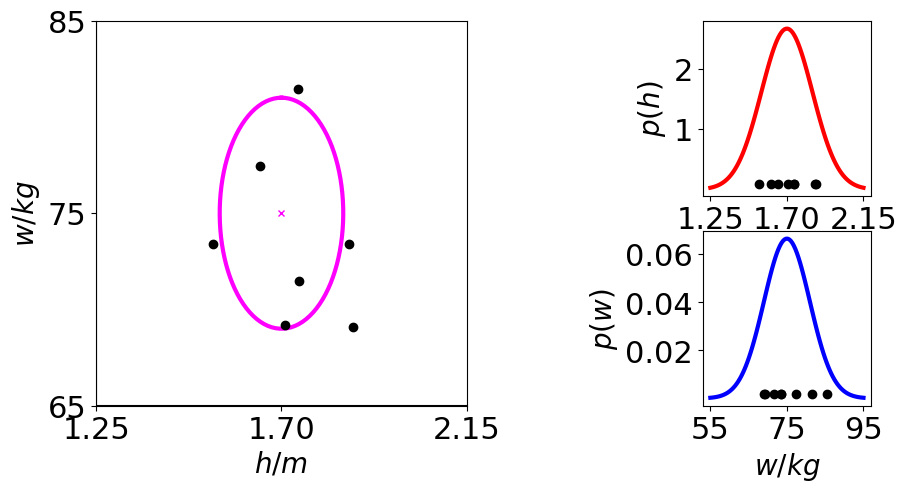

In [20]:
plot.independent_height_weight(num_samps=8,
                               diagrams='./ml')

In [17]:
import notutils as nu
from ipywidgets import IntSlider

In [18]:
import notutils as nu

In [19]:
nu.display_plots('independent_height_weight{fig:0>3}.svg',
                            directory='./ml',
                            fig=IntSlider(0, 0, 7, 1))

interactive(children=(IntSlider(value=0, description='fig', max=7), Output()), _dom_classes=('widget-interact'…

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/independent_height_weight007.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>Samples from independent Gaussian variables that might
represent heights and weights.</i>

In reality height and weight are *not* independent. Taller people tend
on average to be heavier, and heavier people are likely to be taller.
This is reflected by the *body mass index*. A ratio suggested by one of
the fathers of statistics, Adolphe Quetelet. Quetelet was interested in
the notion of the *average man* and collected various statistics about
people. He defined the BMI to be, $$
\text{BMI} = \frac{w}{h^2}
$$To deal with this dependence we now introduce the notion of
*correlation* to the multivariate Gaussian density.

## Sampling Two Dimensional Variables

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/two-d-gaussian-correlated-sample.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/two-d-gaussian-correlated-sample.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [22]:
import mlai.plot as plot

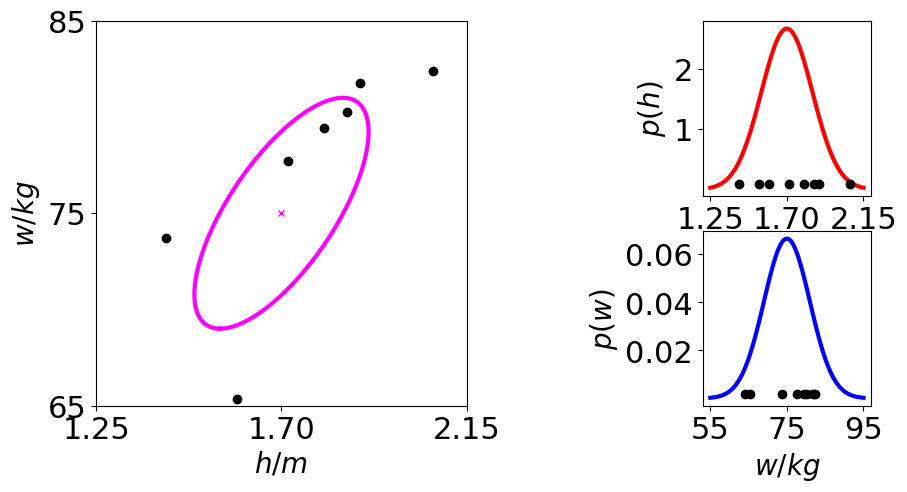

In [23]:
plot.correlated_height_weight(num_samps=8,
                              diagrams='./ml')

In [24]:
import notutils as nu
from ipywidgets import IntSlider

In [25]:
nu.display_plots('correlated_height_weight{fig:0>3}.svg',
                            directory='./ml',
                            fig=IntSlider(0, 0, 7, 1))

interactive(children=(IntSlider(value=0, description='fig', max=7), Output()), _dom_classes=('widget-interact'…

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/correlated_height_weight007.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>Samples from *correlated* Gaussian variables that might
represent heights and weights.</i>

## Independent Gaussians

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/two-d-gaussian-maths.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/two-d-gaussian-maths.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

$$
p(w, h) = p(w)p(h)
$$

$$
p(w, h) = \frac{1}{\sqrt{2\pi \sigma_1^2}\sqrt{2\pi\sigma_2^2}} \exp\left(-\frac{1}{2}\left(\frac{(w-\mu_1)^2}{\sigma_1^2} + \frac{(h-\mu_2)^2}{\sigma_2^2}\right)\right)
$$

$$
p(w, h) = \frac{1}{\sqrt{2\pi\sigma_1^22\pi\sigma_2^2}} \exp\left(-\frac{1}{2}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\mu_1 \\ \mu_2\end{bmatrix}\right)^\top\begin{bmatrix}\sigma_1^2& 0\\0&\sigma_2^2\end{bmatrix}^{-1}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\mu_1 \\ \mu_2\end{bmatrix}\right)\right)
$$

$$
p(\mathbf{ y}) = \frac{1}{\det{2\pi \mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{ y}- \boldsymbol{ \mu})^\top\mathbf{D}^{-1}(\mathbf{ y}- \boldsymbol{ \mu})\right)
$$

## Correlated Gaussian

Form correlated from original by rotating the data space using matrix
$\mathbf{R}$.

$$
p(\mathbf{ y}) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{ y}- \boldsymbol{ \mu})^\top\mathbf{D}^{-1}(\mathbf{ y}- \boldsymbol{ \mu})\right)
$$

$$
p(\mathbf{ y}) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{R}^\top\mathbf{ y}- \mathbf{R}^\top\boldsymbol{ \mu})^\top\mathbf{D}^{-1}(\mathbf{R}^\top\mathbf{ y}- \mathbf{R}^\top\boldsymbol{ \mu})\right)
$$

$$
p(\mathbf{ y}) = \frac{1}{\det{2\pi\mathbf{D}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{ y}- \boldsymbol{ \mu})^\top\mathbf{R}\mathbf{D}^{-1}\mathbf{R}^\top(\mathbf{ y}- \boldsymbol{ \mu})\right)
$$ this gives a covariance matrix: $$
\mathbf{C}^{-1} = \mathbf{R}\mathbf{D}^{-1} \mathbf{R}^\top
$$

$$
p(\mathbf{ y}) = \frac{1}{\det{2\pi\mathbf{C}}^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{ y}- \boldsymbol{ \mu})^\top\mathbf{C}^{-1} (\mathbf{ y}- \boldsymbol{ \mu})\right)
$$ this gives a covariance matrix: $$
\mathbf{C}= \mathbf{R}\mathbf{D} \mathbf{R}^\top
$$

## The Prior Density

Let’s assume that the prior density is given by a zero mean Gaussian,
which is independent across each of the parameters, $$
\mathbf{ w}\sim \mathscr{N}\left(\mathbf{0},\alpha \mathbf{I}\right)
$$ In other words, we are assuming, for the prior, that each element of
the parameters vector, $w_i$, was drawn from a Gaussian density as
follows $$
w_i \sim \mathscr{N}\left(0,\alpha\right)
$$ Let’s start by assigning the parameter of the prior distribution,
which is the variance of the prior distribution, $\alpha$.

In [26]:
# set prior variance on w
alpha = 4.
# set the order of the polynomial basis set
order = 5
# set the noise variance
sigma2 = 0.01

## Further Reading

-   Section 1.2.3 (pg 21–24) of Bishop (2006)

-   Sections 3.1-3.4 (pg 95-117) of Rogers and Girolami (2011)

-   Section 1.2.3 (pg 21–24) of Bishop (2006)

-   Section 1.2.6 (start from just past eq 1.64 pg 30-32) of
    Bishop (2006)

-   Multivariate Gaussians: Section 2.3 up to top of pg 85 of
    Bishop (2006)

-   Section 3.3 up to 159 (pg 152–159) of Bishop (2006)

## Generating from the Model

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/prior-sampling-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/prior-sampling-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

A very important aspect of probabilistic modelling is to *sample* from
your model to see what type of assumptions you are making about your
data. In this case that involves a two stage process.

1.  Sample a candiate parameter vector from the prior.
2.  Place the candidate parameter vector in the likelihood and sample
    functions conditiond on that candidate vector.
3.  Repeat to try and characterise the type of functions you are
    generating.

Given a prior variance (as defined above) we can now sample from the
prior distribution and combine with a basis set to see what assumptions
we are making about the functions *a priori* (i.e. before we’ve seen the
data). Firstly we compute the basis function matrix. We will do it both
for our training data, and for a range of prediction locations
(`x_pred`).

In [27]:
import numpy as np
import pods

In [28]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y - offset)/scale
xlim = (1876,2044)

num_data = x.shape[0]

Acquiring resource: olympic_marathon_men

Details of data: 
Olympic mens' marathon gold medal winning times from 1896 to 2012. Time given in pace (minutes per kilometer). Data is originally downloaded and collated from Wikipedia, we are not responsible for errors in the data

After downloading the data will take up 584 bytes of space.

Data will be stored in /root/ods_data_cache/olympic_marathon_men.

Do you wish to proceed with the download? [yes/no]
yes
|    Downloading   0.001MB     |
|>|


now let’s build the basis matrices. We define the polynomial basis as
follows.

In [29]:
import mlai
import inspect
file_path = inspect.getfile(mlai.polynomial)

In [30]:
# %load -s polynomial /usr/local/lib/python3.12/dist-packages/mlai/mlai.py
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    "Polynomial basis"
    centre = data_limits[0]/2. + data_limits[1]/2.
    span = data_limits[1] - data_limits[0]
    z = np.asarray(x, dtype=float) - centre
    z = 2*z/span
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = z**i
    return Phi


<unknown>:217: SyntaxWarning: invalid escape sequence '\*'
<unknown>:562: SyntaxWarning: invalid escape sequence '\s'
<unknown>:563: SyntaxWarning: invalid escape sequence '\d'
<unknown>:564: SyntaxWarning: invalid escape sequence '\d'
<unknown>:565: SyntaxWarning: invalid escape sequence '\d'
<unknown>:737: SyntaxWarning: invalid escape sequence '\*'


In [31]:
import mlai

In [32]:
degree=4
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(xlim[0], xlim[1], num_pred_data)[:, None] # input locations for predictions
data_limits=xlim
basis = mlai.Basis(mlai.polynomial, number=degree+1, data_limits=data_limits)
Phi_pred = basis.Phi(x_pred)
Phi = basis.Phi(x)

## Sampling from the Prior

Now we will sample from the prior to produce a vector $\mathbf{ w}$ and
use it to plot a function which is representative of our belief *before*
we fit the data. To do this we are going to use the properties of the
Gaussian density and a sample from a *standard normal* using the
function `np.random.normal`.

## Scaling Gaussian-distributed Variables

First, let’s consider the case where we have one data point and one
feature in our basis set. In otherwords $\mathbf{ f}$ would be a scalar,
$\mathbf{ w}$ would be a scalar and $\boldsymbol{ \Phi}$ would be a
scalar. In this case we have $$
f= \phi w
$$ If $w$ is drawn from a normal density, $$
w\sim \mathscr{N}\left(\mu_w,c_w\right)
$$ and $\phi$ is a scalar value which we are given, then properties of
the Gaussian density tell us that $$
\phi w\sim \mathscr{N}\left(\phi\mu_w,\phi^2c_w\right)
$$ Let’s test this out numerically. First we will draw 200 samples from
a standard normal,

In [33]:
w_vec = np.random.normal(size=200)

We can compute the mean of these samples and their variance

In [34]:
print('w sample mean is ', w_vec.mean())
print('w sample variance is ', w_vec.var())

w sample mean is  0.06262011522429427
w sample variance is  1.0841850823998898


These are close to zero (the mean) and one (the variance) as you’d
expect. Now compute the mean and variance of the scaled version,

In [35]:
phi = 7
f_vec = phi*w_vec
print('True mean should be phi*0 = 0.')
print('True variance should be phi*phi*1 = ', phi*phi)
print('f sample mean is ', f_vec.mean())
print('f sample variance is ', f_vec.var())

True mean should be phi*0 = 0.
True variance should be phi*phi*1 =  49
f sample mean is  0.43834080657005986
f sample variance is  53.125069037594606


If you increase the number of samples then you will see that the sample
mean and the sample variance begin to converge towards the true mean and
the true variance. Obviously adding an offset to a sample from
`np.random.normal` will change the mean. So if you want to sample from a
Gaussian with mean `mu` and standard deviation `sigma` one way of doing
it is to sample from the standard normal and scale and shift the result,
so to sample a set of $w$ from a Gaussian with mean $\mu$ and variance
$\alpha$, $$w\sim \mathscr{N}\left(\mu,\alpha\right)$$ We can simply
scale and offset samples from the *standard normal*.

In [36]:
mu = 4 # mean of the distribution
alpha = 2 # variance of the distribution
w_vec = np.random.normal(size=200)*np.sqrt(alpha) + mu
print('w sample mean is ', w_vec.mean())
print('w sample variance is ', w_vec.var())

w sample mean is  4.212494816683885
w sample variance is  1.922281076535937


Here the `np.sqrt` is necesssary because we need to multiply by the
standard deviation and we specified the variance as `alpha`. So scaling
and offsetting a Gaussian distributed variable keeps the variable
Gaussian, but it effects the mean and variance of the resulting
variable.

To get an idea of the overall shape of the resulting distribution, let’s
do the same thing with a histogram of the results.

In [37]:
import matplotlib.pyplot as plt
import mlai.plot as plot

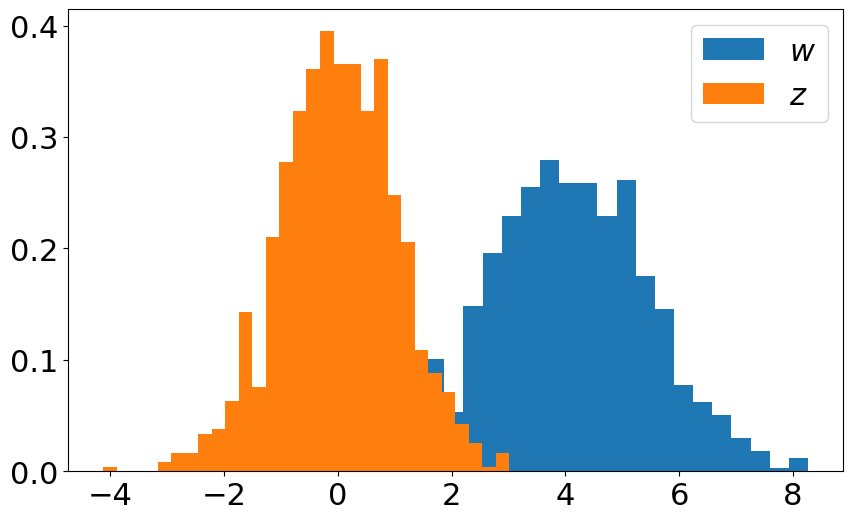

In [38]:
# First the standard normal
z_vec = np.random.normal(size=1000) # by convention, in statistics, z is often used to denote samples from the standard normal
w_vec = z_vec*np.sqrt(alpha) + mu
# plot normalized histogram of w, and then normalized histogram of z on top
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.hist(w_vec, bins=30, density=True)
ax.hist(z_vec, bins=30, density=True)
_ = ax.legend(('$w$', '$z$'))

Now re-run this histogram with 100,000 samples and check that the both
histograms look qualitatively Gaussian.

## Sampling from the Prior

Let’s use this way of constructing samples from a Gaussian to check what
functions look like *a priori*. The process will be as follows. First,
we sample a random vector $K$ dimensional from `np.random.normal`. Then
we scale it by $\sqrt{\alpha}$ to obtain a prior sample of
$\mathbf{ w}$.

In [39]:
K = degree + 1
z_vec = np.random.normal(size=K)
w_sample = z_vec*np.sqrt(alpha)
print(w_sample)

[-0.67743539  0.16461529  0.34705648  0.45278442  2.83383119]


Now we can combine our sample from the prior with the basis functions to
create a function,

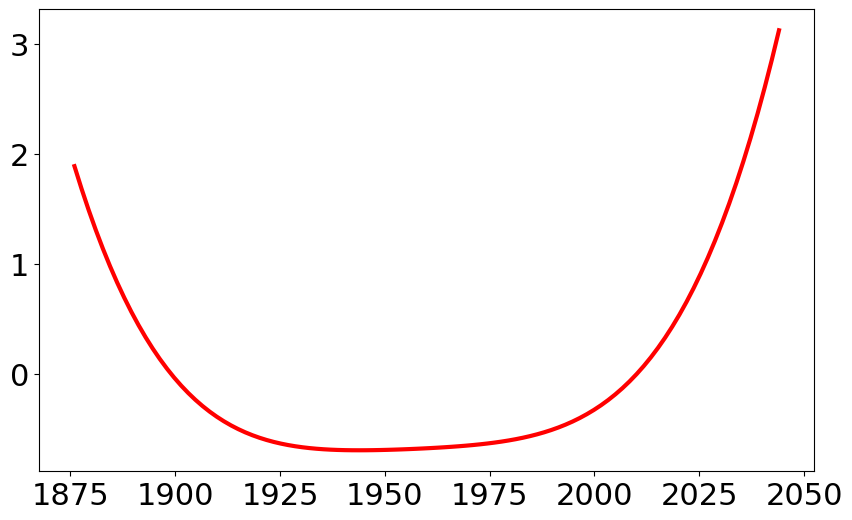

In [40]:
f_sample = np.dot(Phi_pred,w_sample)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x_pred.flatten(), f_sample.flatten(), 'r-', linewidth=3)

Note that we have carefully scaled our data using `xlim` to ensure that
the polynomials don’t go too large. These samples should be well
behaved.

Now we need to recompute the basis functions from above,

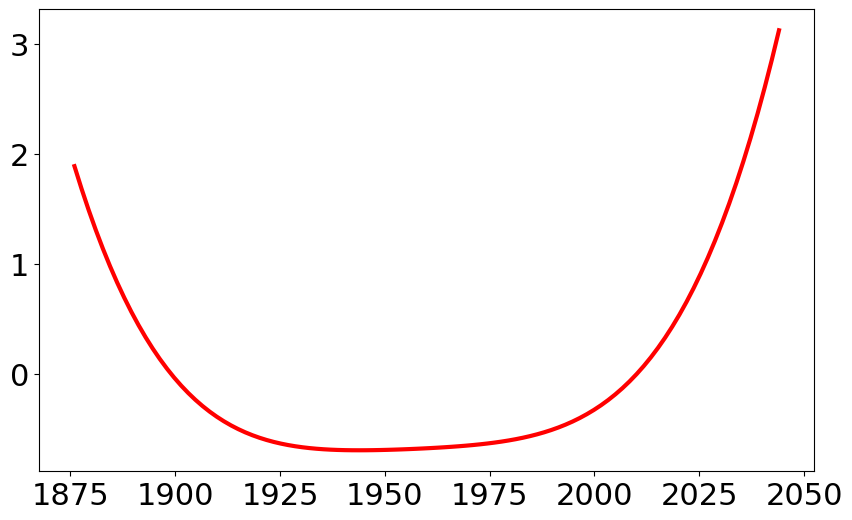

In [41]:
f_sample = np.dot(Phi_pred, w_sample)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x_pred.flatten(), f_sample.flatten(), 'r-', linewidth=3)

Now let’s loop through some samples and plot various functions as
samples from this system,

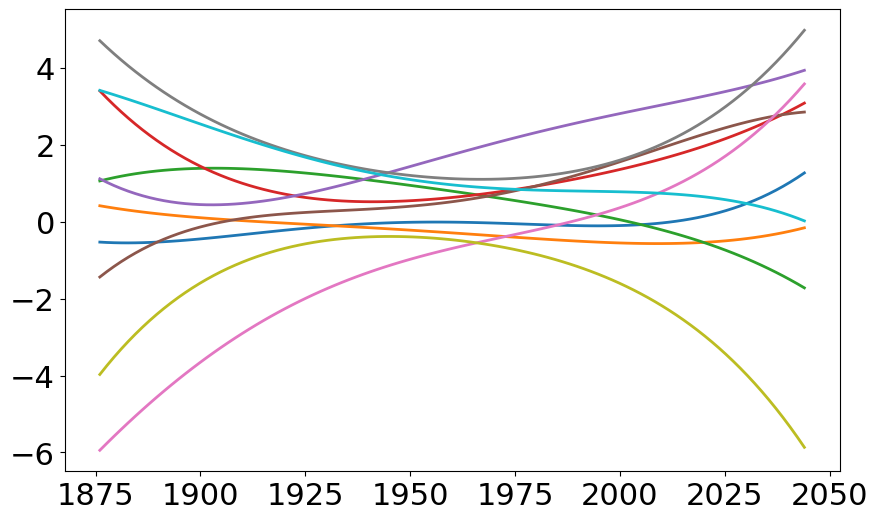

In [42]:
num_samples = 10
K = degree+1
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
for i in range(num_samples):
    z_vec = np.random.normal(size=K)
    w_sample = z_vec*np.sqrt(alpha)
    f_sample = np.dot(Phi_pred,w_sample)
    _ = ax.plot(x_pred.flatten(), f_sample.flatten(), linewidth=2)

The predictions for the mean output can now be computed. We want the
expected value of the predictions under the posterior distribution. In
matrix form, the predictions can be computed as $$
\mathbf{ f}= \boldsymbol{ \Phi}\mathbf{ w}.
$$ This involves a matrix multiplication between a fixed matrix
$\boldsymbol{ \Phi}$ and a vector that is drawn from a distribution
$\mathbf{ w}$. Because $\mathbf{ w}$ is drawn from a distribution, this
imples that $\mathbf{ f}$ should also be drawn from a distribution.
There are two distributions we are interested in though. We have just
been sampling from the *prior* distribution to see what sort of
functions we get *before* looking at the data. In Bayesian inference, we
need to computer the *posterior* distribution and sample from that
density.

## The Bayesian Approach

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/the-bayesian-approach.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/the-bayesian-approach.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now we will study Bayesian approaches to regression. In the Bayesian
approach we define a *prior* density over our parameters, $m$ and $c$ or
more generally $\mathbf{ w}$. This prior distribution gives us a range
of expected values for our parameter *before* we have seen the data. The
object in Bayesian inference is to then compute the*posterior* density
which is the effect on the density of having observed the data. In
standard probability notation we write the prior distribution as, $$
p(\mathbf{ w}),
$$ so it is the *marginal* distribution for the parameters, i.e. the
distribution we have for the parameters without any knowledge about the
data. The posterior distribution is written as, $$
p(\mathbf{ w}|\mathbf{ y}, \mathbf{X}).
$$ So the posterior distribution is the *conditional* distribution for
the parameters given the data (which in this case consists of pairs of
observations including response variables (or targets), $y_i$, and
covariates (or inputs) $\mathbf{ x}_i$. Where here we are allowing the
inputs to be multivariate.

The posterior is recovered from the prior using *Bayes’ rule*. Which is
simply a rewriting of the product rule. We can recover Bayes’ rule as
follows. The product rule of probability tells us that the joint
distribution is given as the product of the conditional and the
marginal. Dropping the inputs from our conditioning for the moment we
have, $$
p(\mathbf{ w}, \mathbf{ y})=p(\mathbf{ y}|\mathbf{ w})p(\mathbf{ w}),
$$ where we see we have related the joint density to the prior density
and the *likelihood* from our previous investigation of regression, $$
p(\mathbf{ y}|\mathbf{ w}) = \prod_{i=1}^n\mathscr{N}\left(y_i|\mathbf{ w}^\top \mathbf{ x}_i, \sigma^2\right)
$$ which arises from the assumption that our observation is given by $$
y_i = \mathbf{ w}^\top \mathbf{ x}_i + \epsilon_i.
$$ In other words this is the Gaussian likelihood we have been fitting
by minimizing the sum of squares. Have a look at [the session on
multivariate regression](./03-linear-regression.html) as a reminder.

We’ve introduce the likelihood, but we don’t have relationship with the
posterior, however, the product rule can also be written in the
following way $$
p(\mathbf{ w}, \mathbf{ y}) = p(\mathbf{ w}|\mathbf{ y})p(\mathbf{ y}),
$$ where here we have simply used the opposite conditioning. We’ve
already introduced the *posterior* density above. This is the density
that represents our belief about the parameters *after* observing the
data. This is combined with the *marginal likelihood*, sometimes also
known as the evidence. It is the marginal likelihood, because it is the
original likelihood of the data with the parameters marginalised,
$p(\mathbf{ y})$. Here it’s conditioned on nothing, but in practice you
should always remember that everything here is conditioned on things
like model choice: which set of basis functions. Because it’s a
regression problem, its also conditioned on the inputs. Using the
equalitybetween the two different forms of the joint density we recover
$$
p(\mathbf{ w}|\mathbf{ y}) = \frac{p(\mathbf{ y}|\mathbf{ w})p(\mathbf{ w})}{p(\mathbf{ y})}
$$ where we divided both sides by $p(\mathbf{ y})$ to recover this
result. Let’s re-introduce the conditioning on the input locations (or
covariates), $\mathbf{X}$ to write the full form of Bayes’ rule for the
regression problem. $$
p(\mathbf{ w}|\mathbf{ y}, \mathbf{X}) = \frac{p(\mathbf{ y}|\mathbf{ w}, \mathbf{X})p(\mathbf{ w})}{p(\mathbf{ y}|\mathbf{X})}
$$ where the posterior density for the parameters given the data is
$p(\mathbf{ w}|\mathbf{ y}, \mathbf{X})$, the marginal likelihood is
$p(\mathbf{ y}|\mathbf{X})$, the prior density is $p(\mathbf{ w})$ and
our original regression likelihood is given by
$p(\mathbf{ y}|\mathbf{ w}, \mathbf{X})$. It turns out that to compute
the posterior the only things we need to do are define the prior and the
likelihood. The other term on the right hand side can be computed by
*the sum rule*. It is one of the key equations of Bayesian inference,
the expectation of the likelihood under the prior, this process is known
as marginalisation, $$
p(\mathbf{ y}|\mathbf{X}) = \int p(\mathbf{ y}|\mathbf{ w},\mathbf{X})p(\mathbf{ w}) \text{d}\mathbf{ w}
$$ I like the term marginalisation, and the description of the
probability as the *marginal likelihood*, because (for me) it somewhat
has the implication that the variable name has been removed, and
(perhaps) written in the margin. Marginalisation of a variable goes from
a likelihood where the variable is in place, to a new likelihood where
all possible values of that variable (under the prior) have been
considered and weighted in the integral. This implies that all we need
for specifying our model is to define the likelihood and the prior. We
already have our likelihood from our earlier discussion, so our focus
now turns to the prior density.

## Computing the Posterior

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/posterior-computation-gaussian.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/posterior-computation-gaussian.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will now attampt to compute the *posterior distribution*. In the
lecture we went through the maths that allows us to compute the
posterior distribution for $\mathbf{ w}$. This distribution is also
Gaussian, $$
p(\mathbf{ w}| \mathbf{ y}, \mathbf{ x}, \sigma^2) = \mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu}_w,\mathbf{C}_w\right)
$$ with covariance, $\mathbf{C}_w$, given by $$
\mathbf{C}_w= \left(\sigma^{-2}\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}+ \alpha^{-1}\mathbf{I}\right)^{-1}
$$ whilst the mean is given by $$
\boldsymbol{ \mu}_w= \mathbf{C}_w\sigma^{-2}\boldsymbol{ \Phi}^\top \mathbf{ y}
$$ Let’s compute the posterior covariance and mean, then we’ll sample
from these densities to have a look at the posterior belief about
$\mathbf{ w}$ once the data has been accounted for. Remember, the
process of Bayesian inference involves combining the prior,
$p(\mathbf{ w})$ with the likelihood,
$p(\mathbf{ y}|\mathbf{ x}, \mathbf{ w})$ to form the posterior,
$p(\mathbf{ w}| \mathbf{ y}, \mathbf{ x})$ through Bayes’ rule, $$
p(\mathbf{ w}|\mathbf{ y}, \mathbf{ x}) = \frac{p(\mathbf{ y}|\mathbf{ x}, \mathbf{ w})p(\mathbf{ w})}{p(\mathbf{ y})}
$$ We’ve looked at the samples for our function
$\mathbf{ f}= \boldsymbol{ \Phi}\mathbf{ w}$, which forms the mean of
the Gaussian likelihood, under the prior distribution. I.e. we’ve
sampled from $p(\mathbf{ w})$ and multiplied the result by the basis
matrix. Now we will sample from the posterior density,
$p(\mathbf{ w}|\mathbf{ y}, \mathbf{ x})$, and check that the new
samples fit do correspond to the data, i.e. we want to check that the
updated distribution includes information from the data set. First we
need to compute the posterior mean and *covariance*.

## Multivariate Bayesian Inference

This section of the lecture talks about how we extend the idea of
Bayesian inference for the multivariate case. It goes through the
multivariate Gaussian and how to complete the square in the linear
algebra as we managed below.

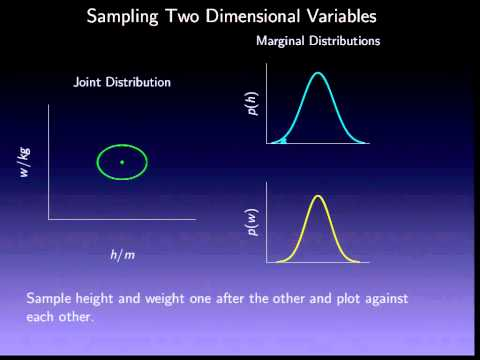

In [45]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Os1iqgpelPw')

Figure: <i>Multivariate Bayesian inference. Lecture 11 from 2012 MLAI
course.</i>

The lecture informs us the the posterior density for $\mathbf{ w}$ is
given by a Gaussian density with covariance $$
\mathbf{C}_w = \left(\sigma^{-2}\boldsymbol{ \Phi}^\top \boldsymbol{ \Phi}+ \alpha^{-1}\mathbf{I}\right)^{-1}
$$ and mean $$
\boldsymbol{ \mu}_w = \mathbf{C}_w\sigma^{-2}\boldsymbol{ \Phi}^\top \mathbf{ y}.
$$

### Exercise 1

Compute the covariance for $\mathbf{ w}$ given the training data, call
the resulting variable `w_cov`. Compute the mean for $\mathbf{ w}$ given
the training data. Call the resulting variable `w_mean`. Assume that
$\sigma^2 = 0.01$

In [46]:
# Write your answer to Exercise 1 here


sigma2 =
w_cov =
w_mean =




SyntaxError: invalid syntax (ipython-input-3487075870.py, line 4)

## Sampling from the Posterior

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/posterior-sampling-basis.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/posterior-sampling-basis.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Before we were able to sample the prior values for the mean
*independently* from a Gaussian using `np.random.normal` and scaling the
result. However, observing the data *correlates* the parameters. Recall
this from the first lab where we had a correlation between the offset,
$c$ and the slope $m$ which caused such problems with the coordinate
ascent algorithm. We need to sample from a *correlated* Gaussian. For
this we can use `np.random.multivariate_normal`.

In [47]:
w_sample = np.random.multivariate_normal(w_mean.flatten(), w_cov)
f_sample = np.dot(Phi_pred,w_sample)
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.plot(x_pred.flatten(), f_sample.flatten(), 'r-', linewidth=3)
ax.plot(x, y, 'r.', markersize=10) # plot data to show fit.

NameError: name 'w_mean' is not defined

Now let’s sample several functions and plot them all to see how the
predictions fluctuate.

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
for i in range(num_samples):
    w_sample = np.random.multivariate_normal(w_mean.flatten(), w_cov)
    f_sample = np.dot(Phi_pred,w_sample)
    ax.plot(x_pred.flatten(), f_sample.flatten(), linewidth=2)
ax.plot(x, y, 'r.', markersize=10) # plot data to show fit.

This gives us an idea of what our predictions are. These are the
predictions that are consistent with data and our prior. Try plotting
different numbers of predictions. You can also try plotting beyond the
range of where the data is and see what the functions do there.

Rather than sampling from the posterior each time to compute our
predictions, it might be better if we just summarised the predictions by
the expected value of the output funciton, $f(x)$, for any particular
input. If we can get formulae for this we don’t need to sample the
values of $f(x)$ we might be able to compute the distribution directly.
Fortunately, in the Gaussian case, we can use properties of multivariate
Gaussians to compute both the mean and the variance of these samples.

## Properties of Gaussian Variables

Gaussian variables have very particular properties, that many other
densities don’t exhibit. Perhaps foremost amoungst them is that the sum
of any Gaussian distributed set of random variables also turns out to be
Gaussian distributed. This property is much rarer than you might expect.

## Sum of Gaussian-distributed Variables

The sum of Gaussian random variables is also Gaussian, so if we have a
random variable $y_i$ drawn from a Gaussian density with mean $\mu_i$
and variance $\sigma^2_i$, $$
y_i \sim \mathscr{N}\left(\mu_i,\sigma^2_i\right)
$$ Then the sum of $K$ independently sampled values of $y_i$ will be
drawn from a Gaussian with mean $\sum_{i=1}^K \mu_i$ and variance
$\sum_{i=1}^K \sigma_i^2$, $$
\sum_{i=1}^K y_i \sim \mathscr{N}\left(\sum_{i=1}^K \mu_i,\sum_{i=1}^K \sigma_i^2\right).
$$ Let’s try that experimentally. First let’s generate a vector of
samples from a standard normal distribution,
$z \sim \mathscr{N}\left(0,1\right)$, then we will scale and offset
them, then keep adding them into a vector `y_vec`.

## Sampling from Gaussians and Summing Up

In [ ]:
K = 10 # how many Gaussians to add.
num_samples = 1000 # how many samples to have in y_vec
mus = np.linspace(0, 5, K) # mean values generated linearly spaced between 0 and 5
sigmas = np.linspace(0.5, 2, K) # sigmas generated linearly spaced between 0.5 and 2
y_vec = np.zeros(num_samples)
for mu, sigma in zip(mus, sigmas):
    z_vec = np.random.normal(size=num_samples) # z is from standard normal
    y_vec += z_vec*sigma + mu # add to y z*sigma + mu

# now y_vec is the sum of each scaled and off set z.
print('Sample mean is ', y_vec.mean(), ' and sample variance is ', y_vec.var())
print('True mean should be ', mus.sum())
print('True variance should be ', (sigmas**2).sum(), ' standard deviation ', np.sqrt((sigmas**2).sum()))

Of course, we can histogram `y_vec` as well.

In [ ]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.hist(y_vec, bins=30, normed=True)
ax.legend('$y$')

## Matrix Multiplication of Gaussian Variables

We are interested in what our model is saying about the sort of
functions we are observing. The fact that summing of Gaussian variables
leads to new Gaussian variables, and scaling of Gaussian variables
*also* leads to Gaussian variables means that matrix multiplication
(which is just a series of sums and scales) also leads to Gaussian
densities. Matrix multiplication is just adding and scaling together, in
the formula, $\mathbf{ f}= \boldsymbol{ \Phi}\mathbf{ w}$ we can extract
the first element from $\mathbf{ f}$ as $$
f_i = \boldsymbol{ \phi}_i^\top \mathbf{ w}
$$ where $\boldsymbol{ \phi}$ is a column vector from the $i$th row of
$\boldsymbol{ \Phi}$ and $f_i$ is the $i$th element of
$\mathbf{ f}$.This vector inner product itself merely implies that $$
f_i = \sum_{j=1}^K w_j \phi_{i, j}
$$ and if we now say that $w_i$ is Gaussian distributed, then because a
scaled Gaussian is also Gaussian, and because a sum of Gaussians is also
Gaussian, we know that $f_i$ is also Gaussian distributed. It merely
remains to work out its mean and covariance. We can do this by looking
at the expectation under a Gaussian distribution. The expectation of the
mean vector is given by $$
\left\langle\mathbf{ f}\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} = \int \mathbf{ f}
\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)
\text{d}\mathbf{ w}= \int \boldsymbol{ \Phi}\mathbf{ w}
\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)
\text{d}\mathbf{ w}= \boldsymbol{ \Phi}\int \mathbf{ w}
\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)
\text{d}\mathbf{ w}= \boldsymbol{ \Phi}\boldsymbol{ \mu}
$$

Which is straightforward. The expectation of
$\mathbf{ f}=\boldsymbol{ \Phi}\mathbf{ w}$ under the Gaussian
distribution for $\mathbf{ f}$ is simply
$\mathbf{ f}=\boldsymbol{ \Phi}\boldsymbol{ \mu}$, where
$\boldsymbol{ \mu}$ is the *mean* of the Gaussian density for
$\mathbf{ w}$. Because our prior distribution was Gaussian with zero
mean, the expectation under the prior is given by $$
\left\langle\mathbf{ f}\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\mathbf{0},\alpha\mathbf{I}\right)} = \mathbf{0}
$$

The covariance is a little more complicated. A covariance matrix is
defined as $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)}
= \left\langle\mathbf{ f}\mathbf{ f}^\top\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)}
- \left\langle\mathbf{ f}\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)}\left\langle\mathbf{ f}\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)}^\top
$$ we’ve already computed
$\left\langle\mathbf{ f}\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)}=\boldsymbol{ \Phi}\boldsymbol{ \mu}$
so we can substitute that in to recover $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} = \left\langle\mathbf{ f}\mathbf{ f}^\top\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} - \boldsymbol{ \Phi}\boldsymbol{ \mu}\boldsymbol{ \mu}^\top \boldsymbol{ \Phi}^\top
$$

So we need the expectation of $\mathbf{ f}\mathbf{ f}^\top$.
Substituting in $\mathbf{ f}= \boldsymbol{ \Phi}\mathbf{ w}$ we have $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} = \left\langle\boldsymbol{ \Phi}\mathbf{ w}\mathbf{ w}^\top \boldsymbol{ \Phi}^\top\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} - \boldsymbol{ \Phi}\boldsymbol{ \mu}\boldsymbol{ \mu}^\top \boldsymbol{ \Phi}^\top
$$ $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} = \boldsymbol{ \Phi}\left\langle\mathbf{ w}\mathbf{ w}^\top\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} \boldsymbol{ \Phi}^\top - \boldsymbol{ \Phi}\boldsymbol{ \mu}\boldsymbol{ \mu}^\top\boldsymbol{ \Phi}^\top
$$ Which is dependent on the second moment of the Gaussian, $$
\left\langle\mathbf{ w}\mathbf{ w}^\top\right\rangle_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} = \mathbf{C}+ \boldsymbol{ \mu}\boldsymbol{ \mu}^\top
$$ that can be substituted in to recover, $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} = \boldsymbol{ \Phi}\mathbf{C}\boldsymbol{ \Phi}^\top
$$ so in the case of the prior distribution, where we have
$\mathbf{C}= \alpha \mathbf{I}$ we can write $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\mathbf{0},\alpha \mathbf{I}\right)} = \alpha \boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top
$$

This implies that the prior we have suggested for $\mathbf{ w}$, which
is Gaussian with a mean of zero and covariance of $\alpha \mathbf{I}$
suggests that the distribution for $\mathbf{ w}$ is also Gaussian with a
mean of zero and covariance of
$\alpha \boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top$. Since our observed
output, $\mathbf{ y}$, is given by a noise corrupted variation of
$\mathbf{ f}$, the final distribution for $\mathbf{ y}$ is given as $$
\mathbf{ y}= \mathbf{ f}+ \boldsymbol{ \epsilon}
$$ where the noise, $\boldsymbol{ \epsilon}$, is sampled from a Gaussian
density:
$\boldsymbol{ \epsilon}\sim \mathscr{N}\left(\mathbf{0},\sigma^2\mathbf{I}\right)$.
So, in other words, we are taking a Gaussian distributed random value
$\mathbf{ f}$, $$
\mathbf{ f}\sim \mathscr{N}\left(\mathbf{0},\alpha\boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top\right)
$$ and adding to it another Gaussian distributed value,
$\boldsymbol{ \epsilon}\sim \mathscr{N}\left(\mathbf{0},\sigma^2\mathbf{I}\right)$,
to form our data observations, $\mathbf{ y}$. Once again the sum of two
(multivariate) Gaussian distributed variables is also Gaussian, with a
mean given by the sum of the means (both zero in this case) and the
covariance given by the sum of the covariances. So we now have that the
marginal likelihood for the data, $p(\mathbf{ y})$ is given by $$
p(\mathbf{ y}) = \mathscr{N}\left(\mathbf{ y}|\mathbf{0},\alpha \boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top + \sigma^2\mathbf{I}\right)
$$ This is our *implicit* assumption for $\mathbf{ y}$ given our prior
assumption for $\mathbf{ w}$.

## Marginal Likelihood

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/polynomial-marginal-likelihood.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/polynomial-marginal-likelihood.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

-   The marginal likelihood can also be computed, it has the form: $$
    p(\mathbf{ y}|\mathbf{X}, \sigma^2, \alpha) = \frac{1}{(2\pi)^\frac{n}{2}\left|\mathbf{K}\right|^\frac{1}{2}} \exp\left(-\frac{1}{2} \mathbf{ y}^\top \mathbf{K}^{-1} \mathbf{ y}\right)
    $$ where
    $\mathbf{K}= \alpha \boldsymbol{ \Phi}\boldsymbol{ \Phi}^\top + \sigma^2 \mathbf{I}$.

-   So it is a zero mean $n$-dimensional Gaussian with covariance matrix
    $\mathbf{K}$.

## Computing the Mean and Error Bars of the Functions

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/compute-output-expectations.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/compute-output-expectations.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

These ideas together, now allow us to compute the mean and error bars of
the predictions. The mean prediction, before corrupting by noise is
given by, $$
\mathbf{ f}= \boldsymbol{ \Phi}\mathbf{ w}
$$ in matrix form. This gives you enough information to compute the
predictive mean.

### Exercise 2

Compute the predictive mean for the function at all the values of the
basis function given by `Phi_pred`. Call the vector of predictions
`\mappingFunction_pred_mean`. Plot the predictions alongside the data.
We can also compute what the training error was. Use the output from
your model to compute the predictive mean, and then compute the sum of
squares error of that predictive mean. $$
E = \sum_{i=1}^n(y_i - \langle f_i\rangle)^2
$$ where $\langle f_i\rangle$ is the expected output of the model at
point $x_i$.

In [ ]:
# Write your answer to Exercise 2 here


# compute mean under posterior density
f_pred_mean =

# plot the predictions

# compute mean at the training data and sum of squares error
f_mean =
sum_squares =
print('The error is: ', sum_squares)



## Computing Error Bars

Finally, we can compute error bars for the predictions. The error bars
are the standard deviations of the predictions for
$\mathbf{ f}=\boldsymbol{ \Phi}\mathbf{ w}$ under the posterior density
for $\mathbf{ w}$. The standard deviations of these predictions can be
found from the variance of the prediction at each point. Those variances
are the diagonal entries of the covariance matrix. We’ve already
computed the form of the covariance under Gaussian expectations, $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu},\mathbf{C}\right)} = \boldsymbol{ \Phi}\mathbf{C}\boldsymbol{ \Phi}^\top
$$ which under the posterior density is given by $$
\text{cov}\left(\mathbf{ f}\right)_{\mathscr{N}\left(\mathbf{ w}|\boldsymbol{ \mu}_w,\mathbf{C}_w\right)} = \boldsymbol{ \Phi}\mathbf{C}_w \boldsymbol{ \Phi}^\top
$$

### Exercise 3

The error bars are given by computing the standard deviation of the
predictions, $f$. For a given prediction $f_i$ the variance is
$\text{var}(f_i) = \langle f_i^2\rangle - \langle f_i \rangle^2$. This
is given by the diagonal element of the covariance of $\mathbf{ f}$, $$
\text{var}(f_i) =
\boldsymbol{ \phi}_{i, :}^\top \mathbf{C}_w \boldsymbol{ \phi}_{i, :}
$$ where $\boldsymbol{ \phi}_{i, :}$ is the basis vector associated with
the input location, $\mathbf{ x}_i$.

Plot the mean function and the error bars for your basis.

In [ ]:
# Write your answer to Exercise 3 here


# Compute variance at function values
f_pred_var =
f_pred_std =

# plot the mean and error bars at 2 standard deviations above and below the mean



## Validation

Now we will test the generalisation ability of these models. Firstly we
are going to use hold out validation to attempt to see which model is
best for extrapolating.

### Exercise 4

Now split the data into training and *hold out* validation sets. Hold
out the data for years after 1980. Compute the predictions for different
model orders between 0 and 8. Find the model order which fits best
according to *hold out* validation. Is it the same as the maximum
likelihood result fom last week?

In [ ]:
# Write your answer to Exercise 4 here






### Exercise 5

Now we will use leave one out cross validation to attempt to see which
model is best at interpolating. Do you get the same result as for hold
out validation? Compare plots of the hold out validation area for
different degrees and the cross validation error for different degrees.
Why are they so different? Select a suitable polynomial for
characterising the differences in the predictions. Plot the mean
function and the error bars for the full data set (to represent the
leave one out solution) and the training data from the hold out
experiment. Discuss your answer.

In [ ]:
# Write your answer to Exercise 5 here






}

## Olympic Marathon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-marathon-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/olympic-marathon-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<table>
<tr>
<td width="70%">

-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardized distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organized leading to very slow times.

</td>
<td width="30%">

<img class="" src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/eliud-kipchoge_berlin_2015.jpg" style="width:100%">
<small>Image from [Wikimedia
Commons](https://commons.wikimedia.org/wiki/File:Eliud_Kipchoge_in_Berlin_-_2015_(cropped).jpg)</small>

</td>
</tr>
</table>

The Olympic Marathon data is a standard dataset for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. Let’s load in the data
and plot.

In [ ]:
%pip install pods

In [ ]:
import numpy as np
import pods

In [ ]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y - offset)/scale

In [ ]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [ ]:
xlim = (1876,2044)
ylim = (2.5, 6.5)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(filename='olympic-marathon.svg',
                  directory='./datasets')

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//datasets/olympic-marathon.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic marathon pace times since 1896.</i>

Things to notice about the data include the outlier in 1904, in that
year the Olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed. More
recent years see more consistently quick marathons.

## Olympic Data with Bayesian Polynomials

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-bayesian-polynomial.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/olympic-marathon-bayesian-polynomial.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Five fold cross validation tests the ability of the model to
*interpolate*.

In [ ]:
import mlai
import pods

In [ ]:
basis = mlai.Basis(mlai.polynomial, number=1, data_limits=data_limits)
max_basis = y.shape[0]

In [ ]:
import mlai.plot as plot

In [ ]:
plot.rmse_fit(x, y, param_name='number', param_range=(1, max_basis+1),
              model=mlai.BLM,
              basis=basis,
              alpha=1,
              sigma2=0.04,
              xlim=xlim,
              objective_ylim=[0.1,0.8],
              diagrams='./ml')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_BLM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml/',
                            num_basis=IntSlider(1, 1, max_basis, 1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_BLM_polynomial_number026.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Bayesian fit with 26th degree polynomial and negative
marginal log likelihood.</i>

## Hold Out Validation

For the polynomial fit, we will now look at *hold out* validation, where
we are holding out some of the most recent points. This tests the abilit
of our model to *extrapolate*.

In [ ]:
import mlai.plot as plot

In [ ]:
plot.holdout_fit(x, y, param_name='number', param_range=(1, max_basis+1),
              diagrams='./ml',
              model=mlai.BLM,
              basis=basis,
              alpha=1,
              sigma2=0.04,
              xlim=data_limits,
              objective_ylim=[0.1,0.6],
              permute=False)

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_val_BLM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml',
                            num_basis=IntSlider(1, 1, max_basis, 1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_val_BLM_polynomial_number026.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Bayesian fit with 29th degree polynomial and hold out
validation scores.</i>

## 5-fold Cross Validation

Five fold cross validation tests the ability of the model to
*interpolate*.

In [ ]:
num_parts=5
plot.cv_fit(x, y, param_name='number', param_range=(1, max_basis+1),
            diagrams='./ml',
            model=mlai.BLM,
            basis=basis,
            alpha=1,
            sigma2=0.04,
            xlim=data_limits,
            objective_ylim=[0.2,0.6],
            num_parts=num_parts)

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
import notutils as nu

In [ ]:
nu.display_plots('olympic_5cv{part:0>2}_BLM_polynomial_number{num_basis:0>3}.svg',
                            directory='./ml',
                            part=(0, 5),
                            num_basis=IntSlider(1, 1, max_basis, 1))

<img src="https://mlatcl.github.io/mlfc/./slides/diagrams//ml/olympic_5cv05_BLM_polynomial_number026.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Bayesian fit with 29th degree polynomial and five fold cross
validation scores.</i>

## Bayesian Interpretation of Regularisation

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/bayesian-interpretation-of-regularisation.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/bayesian-interpretation-of-regularisation.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Bootstrap Predication and Bayesian Misspecified Models:
<https://www.jstor.org/stable/3318894#metadata_info_tab_contents>

Edwin Fong and Chris Holmes: On the Marginal Likelihood and Cross
Validation <https://arxiv.org/abs/1905.08737>

## Further Reading

-   Section 3.7–3.8 (pg 122–133) of Rogers and Girolami (2011)

-   Section 3.4 (pg 161–165) of Bishop (2006)

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   company: [Trent AI](https://trent.ai)
-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References

Bishop, C.M., 2006. Pattern recognition and machine learning. springer.

Rogers, S., Girolami, M., 2011. A first course in machine learning. CRC
Press.